In [1]:
import os; os.chdir("../")

In [2]:
import matplotlib.pyplot as plt
from PIL import Image

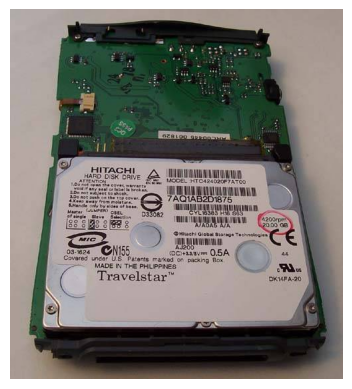

In [3]:
data_path = "../tutorials/data/ImageNet/samples/"
target = "hard_disc"

for info in os.walk(data_path):
    img_path = [data_path + filename for filename in info[-1] if target in filename][0]

# Show the image
img = Image.open(img_path)
plt.imshow(img)
plt.axis("off")
plt.show()


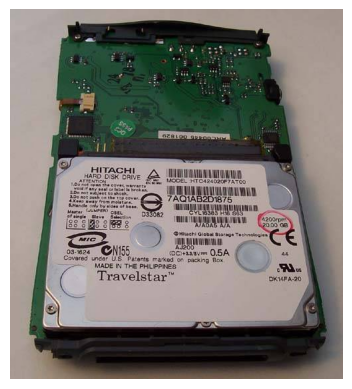

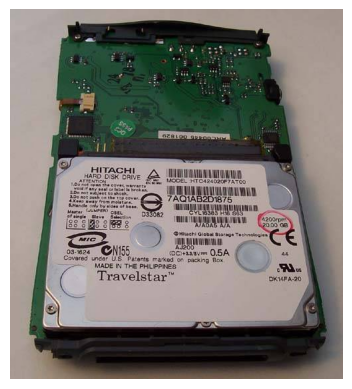

Top-5 Predictions:
hard disc: 0.9999
modem: 0.0001
screw: 0.0000
oscilloscope: 0.0000
projector: 0.0000


In [4]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import torch
from torchvision import models, transforms
from torchvision.models import vgg16, VGG16_Weights

# 경로 설정
data_path = "../tutorials/data/ImageNet/samples/"
target = "hard_disc"

# 파일 찾기
for info in os.walk(data_path):
    img_path = [os.path.join(data_path, filename) for filename in info[-1] if target in filename][0]

# 이미지 출력
img = Image.open(img_path).convert("RGB")
plt.imshow(img)
plt.axis("off")
plt.show()

import os
from PIL import Image
import matplotlib.pyplot as plt
import torch
from torchvision import models
from torchvision.models import vgg16, VGG16_Weights

# 경로 설정
data_path = "../tutorials/data/ImageNet/samples/"
target = "hard_disc"

# 파일 찾기
for info in os.walk(data_path):
    img_path = [os.path.join(data_path, filename) for filename in info[-1] if target in filename][0]

# 이미지 출력
img = Image.open(img_path).convert("RGB")
plt.imshow(img)
plt.axis("off")
plt.show()

# -------------------------
# 1. Weights 불러오기
# -------------------------
weights = VGG16_Weights.IMAGENET1K_V1

# 2. Transform 정의
transform = weights.transforms()

# 3. 모델 불러오기 및 가중치 로딩
model = vgg16(weights=weights)
model.eval()

# -------------------------
# 4. 이미지 전처리
# -------------------------
input_tensor = transform(img).unsqueeze(0)  # batch size = 1

# -------------------------
# 5. 예측
# -------------------------
with torch.no_grad():
    output = model(input_tensor)
    prob = torch.nn.functional.softmax(output[0], dim=0)
    top5 = torch.topk(prob, 5)

# -------------------------
# 6. 클래스 라벨 출력
# -------------------------
labels = weights.meta["categories"]

print("Top-5 Predictions:")
for idx, score in zip(top5.indices, top5.values):
    print(f"{labels[idx]}: {score.item():.4f}")


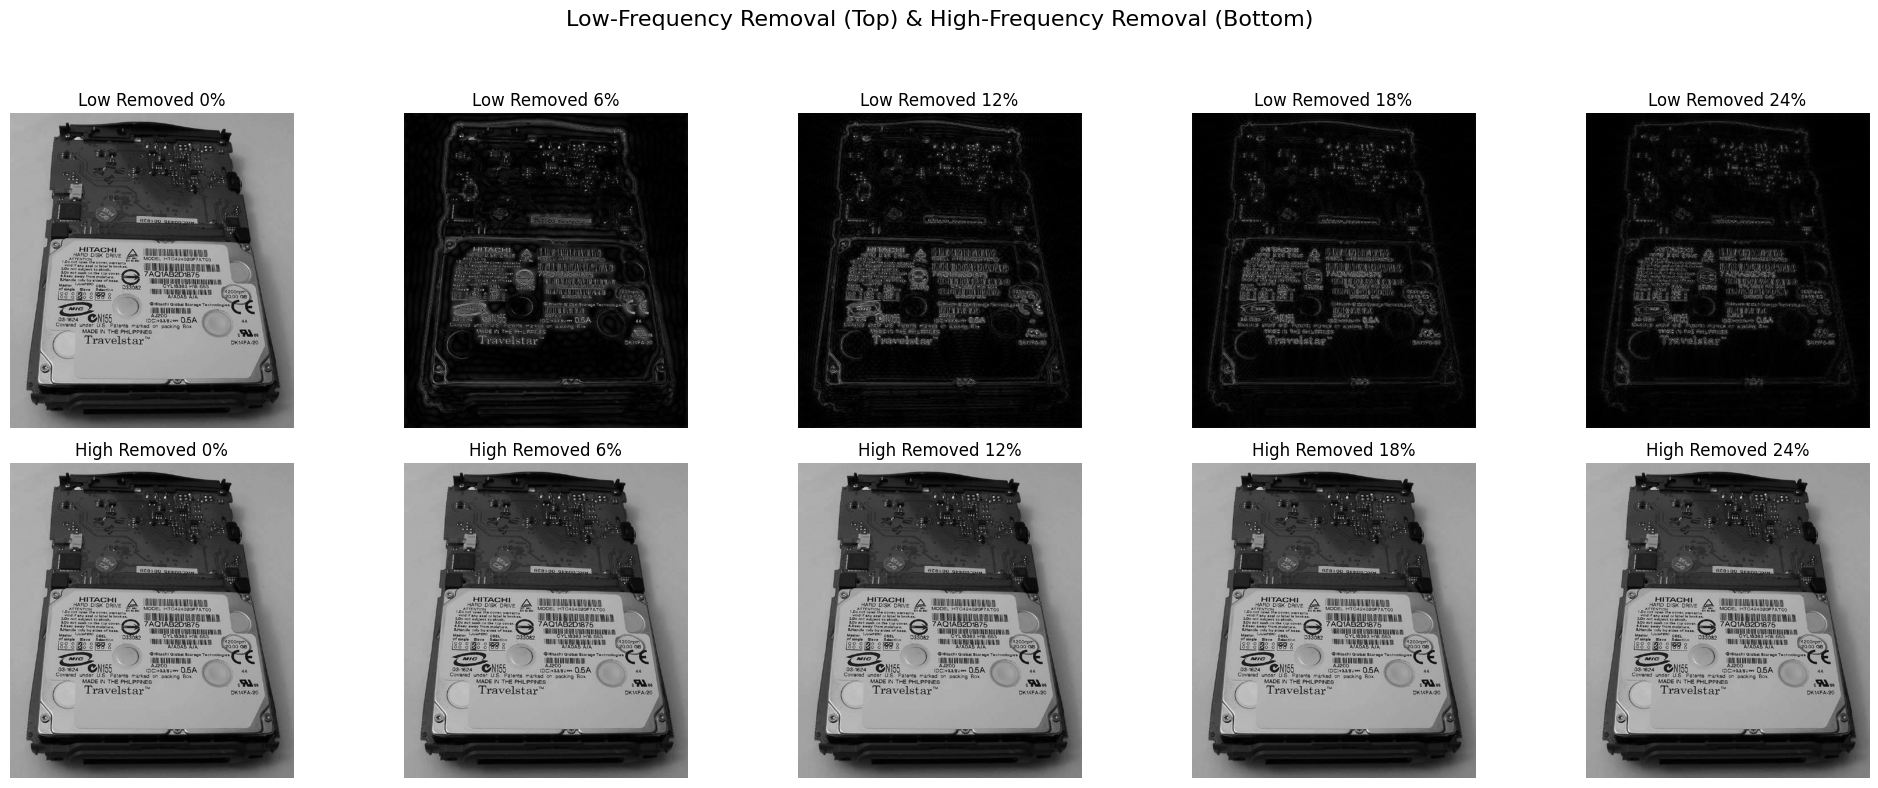

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
from numpy.fft import fft2, ifft2, fftshift, ifftshift

# 이미지 로딩
img = Image.open(img_path).convert("L")  # grayscale 변환
img_np = np.array(img)

# Fourier transform
f = fft2(img_np)
fshift = fftshift(f)  # 중심을 중심으로 이동
magnitude_spectrum = 20 * np.log(np.abs(fshift) + 1e-8)

rows, cols = img_np.shape
crow, ccol = rows // 2, cols // 2
radius_max = int(np.sqrt(crow**2 + ccol**2))  # max radius in freq domain

# Plotting
fig, axs = plt.subplots(2, 5, figsize=(20, 8))
fig.suptitle("Low-Frequency Removal (Top) & High-Frequency Removal (Bottom)", fontsize=16)

for i, frac in enumerate(np.linspace(0, 0.24, 5)):  # 0%, 10%, ..., 90%

    # ----------------------
    # 1. 저주파 제거
    # ----------------------
    mask_low = np.ones_like(fshift, dtype=np.uint8)
    r_cut = int(radius_max * frac)
    for y in range(rows):
        for x in range(cols):
            if np.sqrt((y - crow) ** 2 + (x - ccol) ** 2) < r_cut:
                mask_low[y, x] = 0

    f_low = fshift * mask_low
    img_low = np.abs(ifft2(ifftshift(f_low)))
    axs[0, i].imshow(img_low, cmap="gray")
    axs[0, i].set_title(f"Low Removed {int(frac * 100)}%")
    axs[0, i].axis("off")

    # ----------------------
    # 2. 고주파 제거
    # ----------------------
    mask_high = np.zeros_like(fshift, dtype=np.uint8)
    r_keep = int(radius_max * (1 - frac))
    for y in range(rows):
        for x in range(cols):
            if np.sqrt((y - crow) ** 2 + (x - ccol) ** 2) < r_keep:
                mask_high[y, x] = 1

    f_high = fshift * mask_high
    img_high = np.abs(ifft2(ifftshift(f_high)))
    axs[1, i].imshow(img_high, cmap="gray")
    axs[1, i].set_title(f"High Removed {int(frac * 100)}%")
    axs[1, i].axis("off")

plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()


In [9]:
# Fourier transform
f = fft2(img_np)
fshift = fftshift(f)  # 중심을 중심으로 이동
magnitude_spectrum = 20 * np.log(np.abs(fshift) + 1e-8)

rows, cols = img_np.shape
crow, ccol = rows // 2, cols // 2
radius_max = int(np.sqrt(crow**2 + ccol**2))  # max radius in freq domain

res = []

for i, frac in enumerate(np.linspace(0, 0.99, 5)):  # 0%, 10%, ..., 90%
    mask_low = np.ones_like(fshift, dtype=np.uint8)
    r_cut = int(radius_max * frac)
    for y in range(rows):
        for x in range(cols):
            if np.sqrt((y - crow) ** 2 + (x - ccol) ** 2) < r_cut:
                mask_low[y, x] = 0

    f_low = fshift * mask_low
    img_low = np.abs(ifft2(ifftshift(f_low)))

    mask_high = np.zeros_like(fshift, dtype=np.uint8)
    r_keep = int(radius_max * (1 - frac))
    for y in range(rows):
        for x in range(cols):
            if np.sqrt((y - crow) ** 2 + (x - ccol) ** 2) < r_keep:
                mask_high[y, x] = 1

    f_high = fshift * mask_high
    img_high = np.abs(ifft2(ifftshift(f_high)))

    # res.append(torch.tensor(img_low))
    # res.append(torch.tensor(img_high))
    res.append(transform(torch.tensor(img_low)).unsqueeze(0))
    res.append(transform(torch.tensor(img_high)).unsqueeze(0))

ValueError: Input and output must have the same number of spatial dimensions, but got input with spatial dimensions of [500] and output size of [284, 256]. Please provide input tensor in (N, C, d1, d2, ...,dK) format and output size in (o1, o2, ...,oK) format.

In [12]:
input_tensor.shape

torch.Size([1, 3, 224, 224])

In [13]:
img_high.shape

(556, 500)

In [11]:
torch.tensor(img_low).shape

torch.Size([556, 500])

In [10]:
transform(torch.tensor(img_low))

ValueError: Input and output must have the same number of spatial dimensions, but got input with spatial dimensions of [500] and output size of [284, 256]. Please provide input tensor in (N, C, d1, d2, ...,dK) format and output size in (o1, o2, ...,oK) format.

In [7]:
res

[tensor([[173.0000, 173.0000, 173.0000,  ..., 152.0000, 152.0000, 152.0000],
         [173.0000, 173.0000, 173.0000,  ..., 152.0000, 152.0000, 152.0000],
         [173.0000, 173.0000, 173.0000,  ..., 152.0000, 152.0000, 152.0000],
         ...,
         [158.0000, 158.0000, 158.0000,  ..., 131.0000, 131.0000, 131.0000],
         [158.0000, 158.0000, 158.0000,  ..., 131.0000, 131.0000, 131.0000],
         [158.0000, 158.0000, 158.0000,  ..., 131.0000, 131.0000, 131.0000]],
        dtype=torch.float64),
 tensor([[172.9750, 173.0249, 172.9753,  ..., 152.0253, 151.9748, 152.0251],
         [173.0251, 172.9751, 173.0248,  ..., 151.9746, 152.0253, 151.9748],
         [172.9748, 173.0250, 172.9751,  ..., 152.0255, 151.9746, 152.0253],
         ...,
         [158.0247, 157.9754, 158.0244,  ..., 130.9750, 131.0249, 130.9752],
         [157.9752, 158.0247, 157.9755,  ..., 131.0251, 130.9750, 131.0249],
         [158.0249, 157.9752, 158.0246,  ..., 130.9748, 131.0251, 130.9750]],
        dtype=to